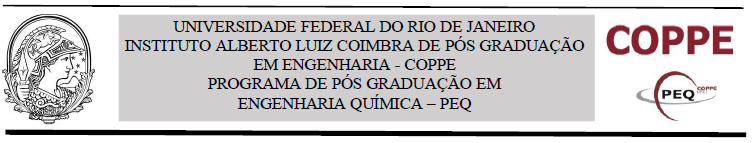

<h1><center>CÁLCULO DA LINHA DE INVERSÃO TÉRMICA DO SH2 COM CPA EOS

Aluno: Vanessa Andrea Mascietti

Docentes: Papa Matar Ndiaye e Frederico Wanderley Tavares

Disciplina: Termodinâmica de Soluções

Setembro 2018, Rio de Janeiro

## INTRODUÇÃO

O método usado por Joule e Thomson é observar a mudança na temperatura de um gás quando ele passa adiabaticamente, através de uma diferença de pressão constante, através de uma válvula.
Ao longo de duas seções, de qualquer duto, conectadas entre si por uma válvula (Fig. 1), um fluxo estacionário com um gás é estabelecido. Esse fluxo é condicionado de forma que a pressão à esquerda da válvula seja maior que a pressão pf à direita, ambos permanecendo constantes. Então, se uma massa de gás ocupa um volume inicial Vi ao passar para a região de menor pressão, onde ocupará um volume Vf, realiza um trabalho W dado por:
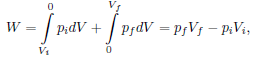
desde então W = Wad, então d'Q = 0 para todo o processo. Então, de acordo com a primeira lei da termodinâmica, nós teremos que:


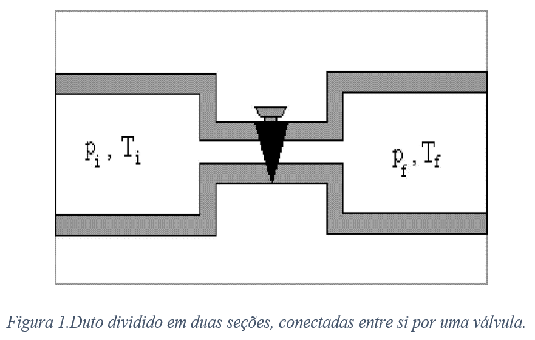

O seja que: 

isto é, o processo é isental. Pode-se dizer que o fluxo de gás da região de alta pressão para a região de baixa pressão obviamente não é reversível, mas em cada uma das seções há um equilíbrio térmico.
Para este processo adiabático, a variação da temperatura com a pressão é dada por:
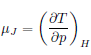
onde μJ é o chamado coeficiente de Joule-Kelvin que possui uma representação geométrica bem definida. Se considerarmos Tf como a variável dependente e variando pi, Ti e pf, podemos obter uma série de pontos que são representados em um diagrama T, p são unidos por uma curva, a isentalpica do processo (ver Fig. 2).
As ispépicas determinadas neste experimento representam um processo, não um estado de equilíbrio.
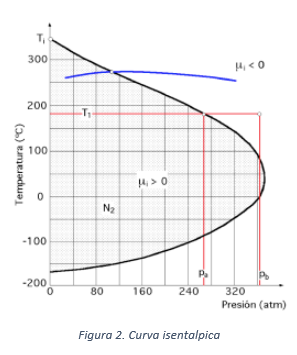
A expansão dos gases ideais ocorre sem variação de temperatura, o que não acontece em gases reais. A explicação é como se segue: entre as moléculas que formam o gás não é uma atracção diminui com o aumento de volume ou as distâncias entre eles, aumentando desta forma a energia interna do sistema, em detrimento do seu próprio calor e, portanto, o gás experimentar um resfriamento
A experiência mostra que nem sempre coisas acontecem, bem como, especialmente quando operando a altas pressões ou temperaturas, uma vez que, nestas condições, as forças de repulsão entre as moléculas de predominar, e, por conseguinte, a expansão verificar aquecida a fase gasosa à temperatura normal e operando a pressões não muito altas, todos os gases são resfriados expandindo-se isentálpicamente, com exceção do hidrogênio e do hélio, que são aquecidos se operados em temperaturas abaixo de 193ºK e 30ºK, respectivamente.
Conseqüentemente, em um caso geral, μi é diferente de zero; a variação da temperatura do fluido no processo de estrangulamento adiabático pode atingir um valor bastante grande, se a queda de pressão também for grande.

Neste contexto, o objetivo deste trabalho é obter a curva de inversão e a temperatura máxima de inversão térmica, onde o coeficiente de Joule Thomson é igual a zero, isto é, você quer reproduzir um gráfico como o apresentado anteriormente na Fig 2. Para isso, a equação de estado do CPA, estudada na disciplina, é implementada, e o composto escolhido é o sulfeto de hidrogênio SH2.

## DESENVOLVIMENTO

O trabalho é dividido em dois Notebooks, o primeiro (este) contém os cálculos das derivadas necessários para cálculos posteriores, enquanto o segundo Notebook calcula as condições de PVT para um coeficiente de Joule Thomson igual a zero, obtendo assim as curvas de inversão e a temperatura máxima de inversão.

Da expressão prévia do coeficiente de Joule Thomson, obtém-se que:
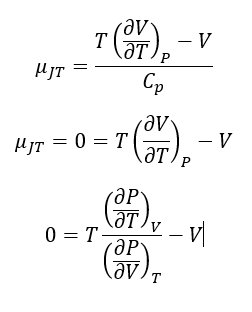
Portanto, estas duas derivadas das equações de estado são calculadas, as quais são explícitas em P, usando a biblioteca sympy  de Anaconda.

Uma associação do tipo 2B é assumida para SH2 e o cálculo de Fração de Sítios não associados é via Huang e Radosz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from sympy import *

In [2]:
R = 8.31447

In [3]:
import sympy as sp

In [4]:
T=sp.Symbol('T')
V=sp.Symbol('V')
a=sp.Symbol('a')
b=sp.Symbol('b')
c=sp.Symbol('c')
Tc=sp.Symbol('Tc')

### Expressões do P cúbico

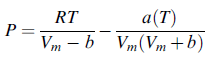

In [5]:
Tr = T/Tc
alpha = a*(1+c*(1-sqrt(Tr)))**2

In [6]:
P = (R*T/(V-b) - alpha/(V*(V+b)))
P

8.31447*T/(V - b) - a*(c*(-sqrt(T/Tc) + 1) + 1)**2/(V*(V + b))

#### Derivadas para coeficiente μJT=0

In [7]:
P.diff(T)

8.31447/(V - b) + a*c*sqrt(T/Tc)*(c*(-sqrt(T/Tc) + 1) + 1)/(T*V*(V + b))

In [8]:
P.diff(V)

-8.31447*T/(V - b)**2 + a*(c*(-sqrt(T/Tc) + 1) + 1)**2/(V*(V + b)**2) + a*(c*(-sqrt(T/Tc) + 1) + 1)**2/(V**2*(V + b))

imagen con definicion de eta

V=-T*P.diff(T)/P.diff(V)
V

### Expressões do P de associação

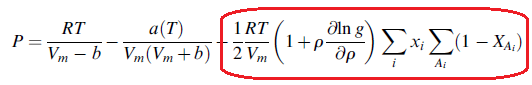

In [9]:
#P_association = -.5 * R * T * ro * (1. + ro * dlngdro) * sum_chi

In [10]:
#acordate de cargar las constantes! pero eso es para cuando tenga que hacer el calculo

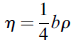
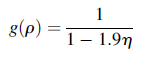
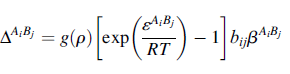
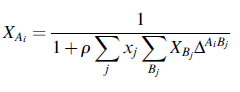
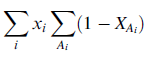

In [11]:
#parâmetros energia de associação e volume de associação
beta=sp.Symbol('beta')
eps=sp.Symbol('eps')

In [12]:
V=sp.Symbol('V')

In [13]:
T=sp.Symbol('T')
V=sp.Symbol('V')
a=sp.Symbol('a')
b=sp.Symbol('b')
c=sp.Symbol('c')
Tc=sp.Symbol('Tc')

In [14]:
ro = 1./V
eta = (1./4.)*b*ro 
g = 1./(1. - 1.9 * eta)
g

1.0/(1.0 - 0.475*b/V)

In [15]:
delta = g * b * beta * (exp(eps/(R*T))-1.)
chi = (-1. + sqrt(1. + 4*ro*delta))/(2*ro*delta)
#na expressão de P
sum_chi=(1-chi)
dlngdro = (1.9*0.25*b)/(1.-1.9*eta)

In [16]:
P_association = -.5 * R * T * ro * (1. + ro * dlngdro) * sum_chi
P_association

-4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V

In [17]:
P_association.diff(T)

-4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.060136124130582*V*eps*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)*exp(0.120272248261164*eps/T)/(T**2*b*beta*(exp(0.120272248261164*eps/T) - 1.0)**2) + 0.120272248261164*eps*exp(0.120272248261164*eps/T)/(T**2*sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V)))*(exp(0.120272248261164*eps/T) - 1.0)))/V - 4.157235*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V

In [18]:
P_association.diff(V)

-4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(-2.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V**2*(1.0 - 0.475*b/V)) - 0.95*b**2*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V**3*(1.0 - 0.475*b/V)**2))/(b*beta*sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V)))*(exp(0.120272248261164*eps/T) - 1.0)) - 0.5*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) - 0.2375*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(V*beta*(exp(0.120272248261164*eps/T) - 1.0)))/V - 4.157235*T*(-0.475*b/(V**2*(1.0 - 0.475*b/V)) - 0.225625*b**2/(V**3*(1.0 - 0.475*b/V)**2))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V + 4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.

### Expressão com o P total (P cubica + P de associação)

In [20]:
eta_zero=-T*(P.diff(T)+P_association.diff(T))/(P.diff(V)+P_association.diff(V))-V
eta_zero

-T*(-4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.060136124130582*V*eps*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)*exp(0.120272248261164*eps/T)/(T**2*b*beta*(exp(0.120272248261164*eps/T) - 1.0)**2) + 0.120272248261164*eps*exp(0.120272248261164*eps/T)/(T**2*sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V)))*(exp(0.120272248261164*eps/T) - 1.0)))/V + 8.31447/(V - b) - 4.157235*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V + a*c*sqrt(T/Tc)*(c*(-sqrt(T/Tc) + 1) + 1)/(T*V*(V + b)))/(-8.31447*T/(V - b)**2 - 4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(-2.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V**2*(1.0 - 0.475*b/V)) - 0.95*b**2*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V**3*(1.0 - 0.475*b/V)*